In [16]:
# date datetime, customers_count int64, status int64, country string
import builtins
len = builtins.len
# [()]

import pandas as pd
import matplotlib
import sys
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
np.seed(341)

def create_dataset():
    result = []
    countries_pool = ['RU', 'KZ', 'US', 'CY', 'ru', 'kZ']
    status_pool = [1,2,3]
    dates_rng = pd.date_range(start='1/24/2023', end='7/24/2023')
    customers_count = np.randint(low=25, high=1000, size=len(dates_rng))
    status = [status_pool[np.randint(low=0, high=len(status_pool))] for i in range(len(dates_rng))] 
    countries = [countries_pool[np.randint(low=0, high=len(countries_pool))] for i in range(len(dates_rng))]
    result = list(zip(dates_rng, customers_count, status, countries))
    
    return result

ds = create_dataset()
ds[:10]

[(Timestamp('2023-01-24 00:00:00'), 652, 2, 'ru'),
 (Timestamp('2023-01-25 00:00:00'), 894, 3, 'CY'),
 (Timestamp('2023-01-26 00:00:00'), 828, 2, 'KZ'),
 (Timestamp('2023-01-27 00:00:00'), 304, 3, 'kZ'),
 (Timestamp('2023-01-28 00:00:00'), 27, 2, 'US'),
 (Timestamp('2023-01-29 00:00:00'), 563, 1, 'ru'),
 (Timestamp('2023-01-30 00:00:00'), 413, 3, 'KZ'),
 (Timestamp('2023-01-31 00:00:00'), 349, 2, 'ru'),
 (Timestamp('2023-02-01 00:00:00'), 462, 3, 'kZ'),
 (Timestamp('2023-02-02 00:00:00'), 729, 1, 'ru')]

In [29]:
df = pd.DataFrame(data=ds, columns=['StatusDate', 'CustomersCount', 'Status', 'CountryCode'])
df.head(10)

,StatusDate,CustomersCount,Status,CountryCode
0,2023-01-24,652,2,ru
1,2023-01-25,894,3,CY
2,2023-01-26,828,2,KZ
3,2023-01-27,304,3,kZ
4,2023-01-28,27,2,US
5,2023-01-29,563,1,ru
6,2023-01-30,413,3,KZ
7,2023-01-31,349,2,ru
8,2023-02-01,462,3,kZ
9,2023-02-02,729,1,ru


In [12]:
dates_rng = pd.date_range(start='1/24/2023', end='7/24/2023')
dates_rng.values
type(dates_rng.values)
dates_rng.values.size

182

In [31]:
import openpyxl

df.to_excel('customers_report.xlsx', index=False)

In [32]:
report_name = 'customers_report.xlsx'
df = pd.read_excel(report_name, 0, index_col='StatusDate')
df.dtypes

CustomersCount     int64
Status             int64
CountryCode       object
dtype: object

In [33]:
df.head(10)

,CustomersCount,Status,CountryCode
StatusDate,,,
2023-01-24,652,2,ru
2023-01-25,894,3,CY
2023-01-26,828,2,KZ
2023-01-27,304,3,kZ
2023-01-28,27,2,US
2023-01-29,563,1,ru
2023-01-30,413,3,KZ
2023-01-31,349,2,ru
2023-02-01,462,3,kZ


In [27]:
df.index

DatetimeIndex(['2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02',
               ...
               '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22',
               '2023-07-23', '2023-07-24'],
              dtype='datetime64[ns]', name='StatusDate', length=182, freq=None)

In [35]:
df['CountryCode'] = df.CountryCode.apply(lambda x: x.upper())
df.head(10)

,CustomersCount,Status,CountryCode
StatusDate,,,
2023-01-24,652,2,RU
2023-01-25,894,3,CY
2023-01-26,828,2,KZ
2023-01-27,304,3,KZ
2023-01-28,27,2,US
2023-01-29,563,1,RU
2023-01-30,413,3,KZ
2023-01-31,349,2,RU
2023-02-01,462,3,KZ


In [36]:
status_filter = df['Status'] == 1
filtered_df = df[status_filter]
filtered_df.head(10)

,CustomersCount,Status,CountryCode
StatusDate,,,
2023-01-29,563,1,RU
2023-02-02,729,1,RU
2023-02-05,961,1,RU
2023-02-08,426,1,US
2023-02-12,691,1,KZ
2023-02-20,334,1,CY
2023-02-22,266,1,KZ
2023-02-23,401,1,RU
2023-02-25,550,1,CY


In [37]:
filtered_df.shape

(62, 3)

In [39]:
country_code_filter = df.CountryCode == 'KZ'
df['CountryCode'][country_code_filter] = 'RU'
df.head(10)

C:\Users\A.Polyakov\AppData\Local\Temp\ipykernel_5052\488301107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryCode'][country_code_filter] = 'RU'


,CustomersCount,Status,CountryCode
StatusDate,,,
2023-01-24,652,2,RU
2023-01-25,894,3,CY
2023-01-26,828,2,RU
2023-01-27,304,3,RU
2023-01-28,27,2,US
2023-01-29,563,1,RU
2023-01-30,413,3,RU
2023-01-31,349,2,RU
2023-02-01,462,3,RU


<Axes: xlabel='StatusDate'>

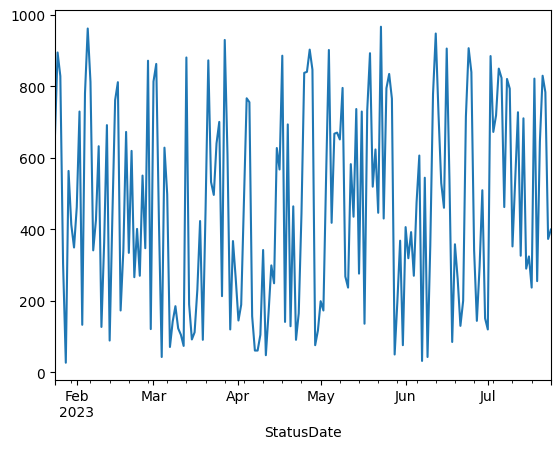

In [40]:
df['CustomersCount'].plot()

In [43]:
groupped_daily_df = df.reset_index().groupby(['CountryCode', 'StatusDate']).sum()
groupped_daily_df.head(20)

CustomersCount  Status
CountryCode StatusDate                        
CY          2023-01-25             894       3
            2023-02-10             127       3
            2023-02-20             334       1
            2023-02-25             550       1
            2023-03-01             813       3
            2023-03-03             415       1
            2023-03-04              43       3
            2023-03-07              71       1
            2023-03-27             929       2
            2023-03-29             120       3
            2023-04-17             885       2
            2023-04-18             141       1
            2023-04-22              91       2
            2023-05-02             173       1
            2023-05-03             552       1
            2023-05-05             418       2
            2023-05-06             667       3
            2023-05-09             795       1
            2023-05-18             733       3
            2023-05-25             794       2

In [44]:
del groupped_daily_df['Status']
groupped_daily_df.head()

CustomersCount
CountryCode StatusDate                
CY          2023-01-25             894
            2023-02-10             127
            2023-02-20             334
            2023-02-25             550
            2023-03-01             813

In [47]:
groupped_daily_df.index.levels[0]

Index(['CY', 'RU', 'US'], dtype='object', name='CountryCode')

<Axes: xlabel='StatusDate'>

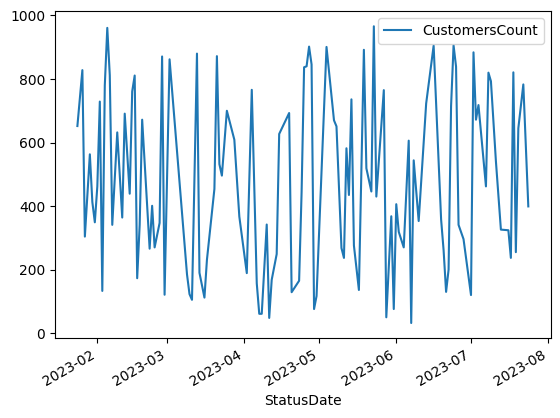

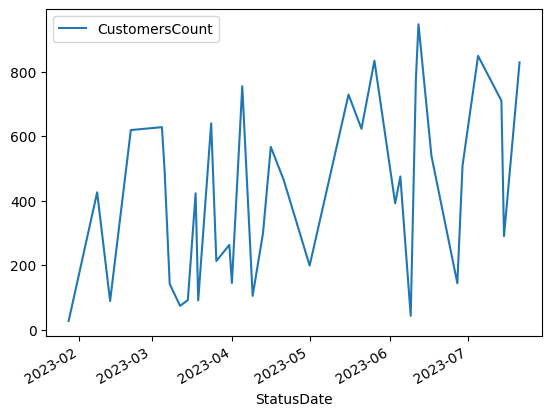

In [49]:
groupped_daily_df.loc['RU'].plot()
groupped_daily_df.loc['US'].plot()